In [2]:
# importing libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# data collection
df=pd.read_csv('C:\\Users\\HP\\Downloads\\archive (14)\\data.csv')

In [4]:
df.head(5)

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


In [5]:
df.shape

(5440, 6)

#### feature engineering :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


In [7]:
# delete missing value
df.dropna(inplace=True)

In [8]:
# adding new features:
df['ratio']=round(df['likes']/df['views'],4)
df['month']=df['date'].str.split(' ').str[0]
df['year']=df['date'].str.split(' ').str[1]

In [9]:
df['year']=df['year'].astype(int)

In [10]:
# df.drop(columns='date',inplace=True)

In [11]:
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7 , 'August':8 , 'September':9, 'October':10, 'November':11, 'December':12}

In [12]:
df['month']=df['month'].map(d)

In [13]:
df['month'].head(5)

0    12
1     2
2     9
3    10
4    10
Name: month, dtype: int64

In [14]:
df.head(5)

,title,author,date,views,likes,link,ratio,month,year
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,0.0297,12,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,0.0299,2,2022
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,0.0291,9,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,0.0281,10,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,0.0300,10,2021


### analysis :

In [15]:
df.describe()

,views,likes,ratio,month,year
count,5.439000e+03,5.439000e+03,5439.000000,5439.000000,5439.000000
mean,2.061955e+06,6.261912e+04,0.030218,6.514433,2014.996874
std,3.567316e+06,1.076533e+05,0.000788,3.444047,4.583638
min,1.200000e+03,3.700000e+01,0.027500,1.000000,1970.000000
25%,6.710000e+05,2.000000e+04,0.029900,3.000000,2012.000000
50%,1.300000e+06,4.100000e+04,0.030000,6.000000,2016.000000
75%,2.100000e+06,6.500000e+04,0.030700,10.000000,2019.000000
max,7.200000e+07,2.100000e+06,0.032900,12.000000,2022.000000


In [16]:
df.sort_values(by='ratio',ascending=False).head(5)

,title,author,date,views,likes,link,ratio,month,year
1112,The importance of queer allyship in the classroom,Coby Everton,November 2019,10000,329,https://ted.com/talks/coby_everton_the_importa...,0.0329,11,2019
1071,Three stories of Scotland,Mackenzie Dalrymple,July 2019,11000,359,https://ted.com/talks/mackenzie_dalrymple_thre...,0.0326,7,2019
3137,Imagining a new future for health systems in A...,Mathieu Lamiaux,June 2015,10000,326,https://ted.com/talks/mathieu_lamiaux_imaginin...,0.0326,6,2015
1462,Solar energy can help put power back in the ha...,Scott Nguyen,April 2019,10000,326,https://ted.com/talks/scott_nguyen_solar_energ...,0.0326,4,2019
2558,Why you should define your fears instead of yo...,Tim Ferriss,April 2017,10000000,325000,https://ted.com/talks/tim_ferriss_why_you_shou...,0.0325,4,2017


In [17]:
best_talk=pd.DataFrame(df.groupby('title')['views'].sum()).reset_index().sort_values(by='views',ascending=False)
best_talk.head(5)

,title,views
1217,Do schools kill creativity?,72000000
5409,Your body language may shape who you are,64000000
2526,Inside the mind of a master procrastinator,60000000
1862,How great leaders inspire action,57000000
3997,The power of vulnerability,56000000


<AxesSubplot:xlabel='title', ylabel='views'>

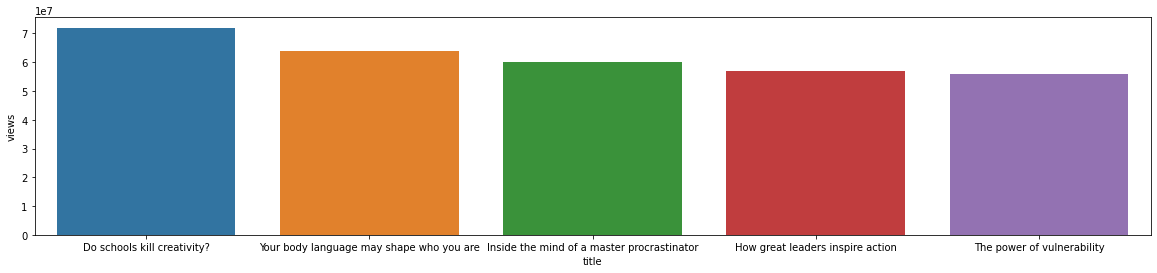

In [18]:
plt.figure(figsize=(20,4))
sns.barplot(x='title',y='views',data=best_talk.head())

conclusion: "Do Schools kill creativity ?" is the most popular talk with maximum views.

In [19]:
x=pd.DataFrame(df.groupby('author')['views'].sum()).reset_index().sort_values(by='views',ascending=False)

In [20]:
x.head(5)

,author,views
148,Alex Gendler,187196000
3902,Sir Ken Robinson,95654000
544,Bill Gates,77800000
3895,Simon Sinek,74800000
594,Brené Brown,72000000


<AxesSubplot:xlabel='author', ylabel='views'>

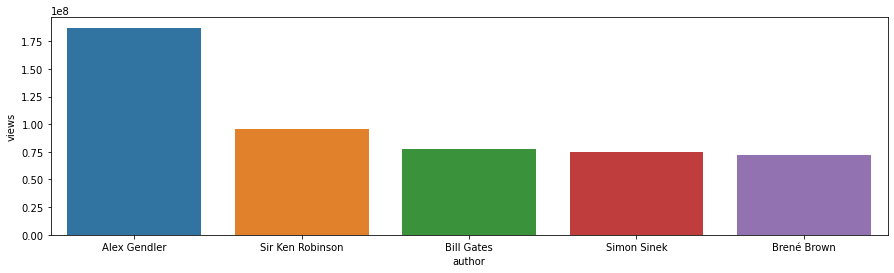

In [21]:
plt.figure(figsize=(15,4))
sns.barplot(x='author',y='views',data=x.head())

conclusion : Alex Gendler is the most popular TED author with maximum views followed by Sir Ken Robinson and Bill Gates respectively.

In [22]:
y=pd.DataFrame({'count':df.groupby('author').size()}).reset_index().sort_values(by='count',ascending=False)

In [23]:
# df['author'].value_counts().head(5)

In [24]:
y.head(5)

,author,count
148,Alex Gendler,45
1781,Iseult Gillespie,33
2845,Matt Walker,18
152,Alex Rosenthal,15
1283,Elizabeth Cox,13


<AxesSubplot:xlabel='author', ylabel='count'>

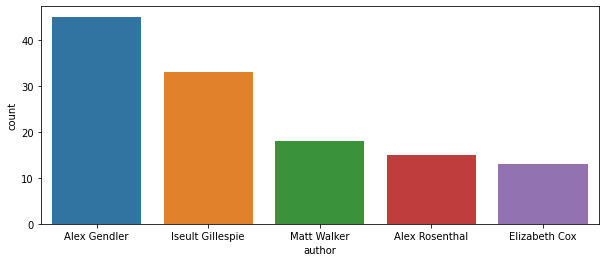

In [25]:
plt.figure(figsize=(10,4))
sns.barplot(x='author',y='count',data=y.head())

conclusion : Alex Gendler is the most popular TED speaker with 45 TED talks

In [26]:
best_month=pd.DataFrame({'count': (df.groupby('month')).size()}).reset_index().sort_values(by='count',ascending=False)

In [27]:
best_month.head(5)

,month,count
1,2,725
10,11,682
9,10,585
2,3,580
3,4,576


In [28]:
best_year=pd.DataFrame({'count':(df.groupby('year')).size()}).reset_index().sort_values(by='count',ascending=False)
best_year.head(5)

,year,count
26,2019,544
27,2020,501
24,2017,495
25,2018,473
23,2016,399


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

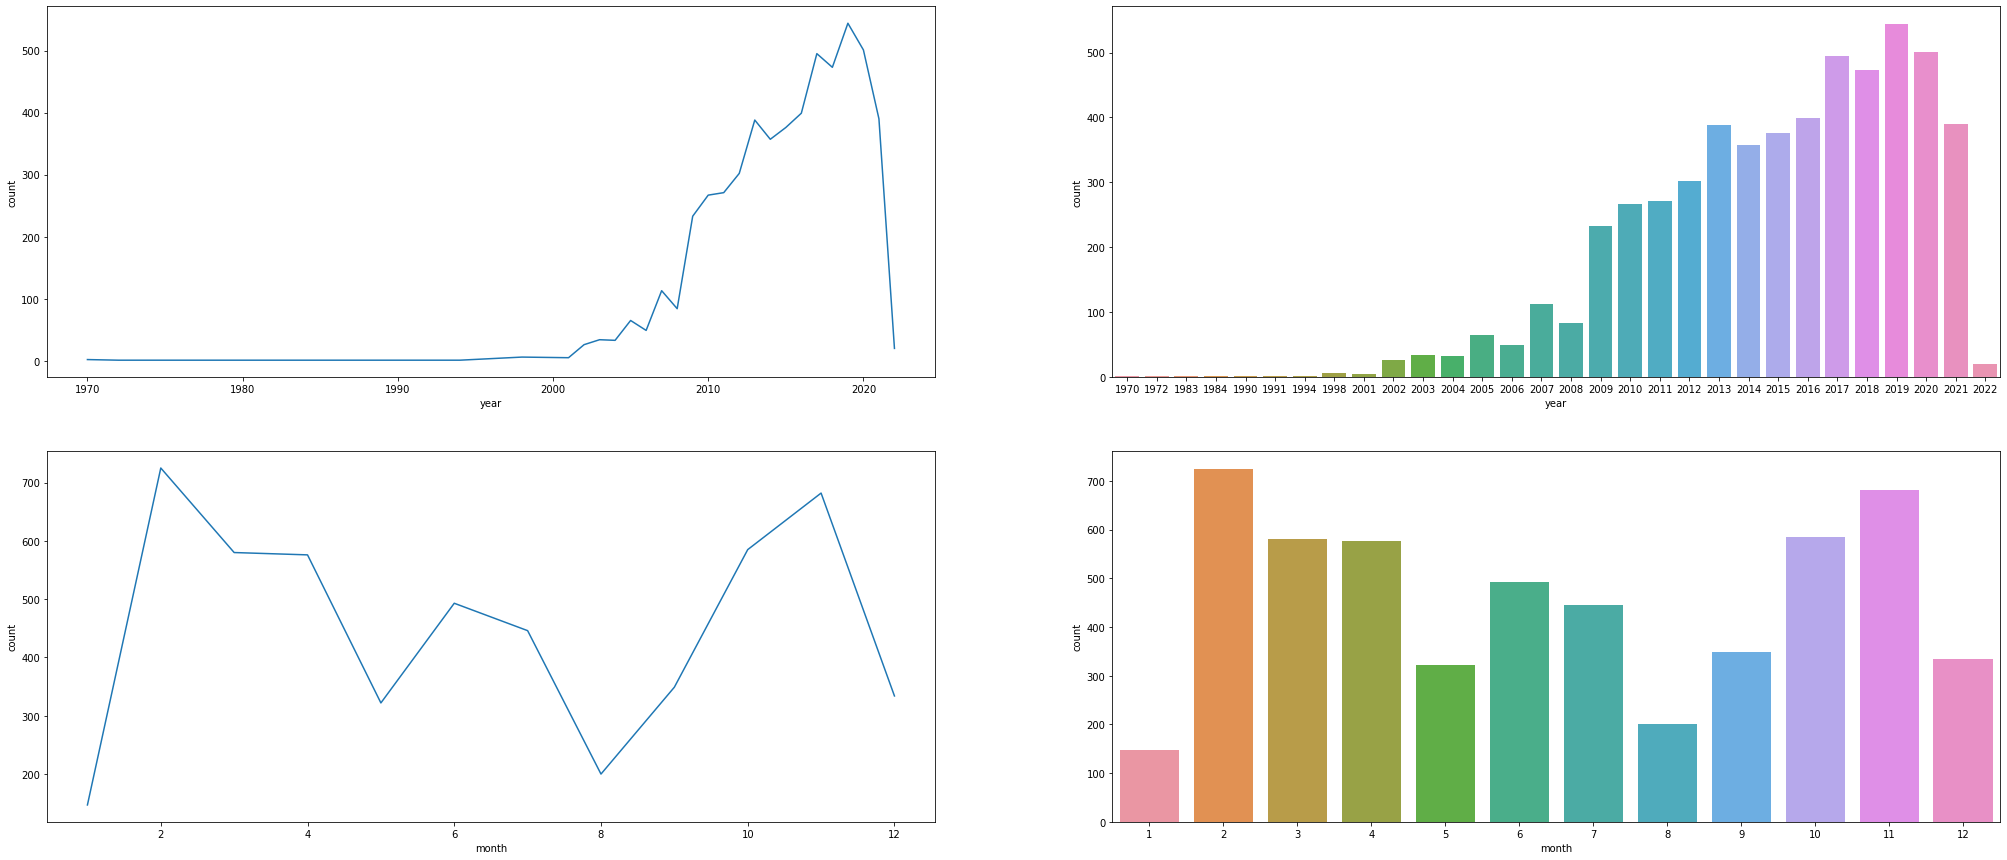

In [29]:
fig,axes=plt.subplots(2,2,figsize=(35,15))
sns.lineplot(x='year',y='count',data=best_year,ax=axes[0,0])
sns.countplot(df['year'],ax=axes[0,1])
sns.lineplot(x='month',y='count',data=best_month,ax=axes[1,0])
sns.countplot(df['month'],ax=axes[1,1])

conclusion:-
1. The no. of ted talks has increased rapidly after 2008-2009. Year 2019 has maximum no of 544 talks followed by 2020 and 2017 with 501 and 495 talks respectively.
2. Number of ted talks get reduced during the summer and rainy seasons. August and May are the months with minimum ted talks. February is the most suitable month for Ted talk with maximum 725 talks followed by November and October respectively.

In [43]:
df['ratio']=df['views']/df['likes']
df.head(5)

,title,author,date,views,likes,link,ratio,month,year
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,33.666667,12,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,33.437500,2,2022
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,34.333333,9,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,35.583333,10,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,33.333333,10,2021


In [44]:
r=pd.DataFrame(df.groupby('author')['views','likes','ratio'].mean()).reset_index().sort_values(by='ratio',ascending=False)
r.head(5)

C:\Users\HP\AppData\Local\Temp/ipykernel_30816/1996246604.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  r=pd.DataFrame(df.groupby('author')['views','likes','ratio'].mean()).reset_index().sort_values(by='ratio',ascending=False)


,author,views,likes,ratio
1076,David Lindell,364000.0,10000.0,36.400000
1766,Ioannis Papachimonas,398000.0,11000.0,36.181818
3714,Sandra Fisher-Martins,361000.0,10000.0,36.100000
3933,Srdja Popovic,397000.0,11000.0,36.090909
4307,Virginia Postrel,433000.0,12000.0,36.083333


conclusion: David Lindell has maximum views to like ratio.

In [49]:
# fav ted talk

x=pd.DataFrame(df.groupby('author')['views'].sum()).reset_index().sort_values(by='views',ascending=False)
fav_author=x[x['views']==x['views'].max()]['author'].values[0]
fav_author_data=df[df['author']==fav_author]
result=pd.DataFrame(fav_author_data[['title','views']].groupby('title').sum()).reset_index().sort_values(by=['views'],ascending=False)
result.head()

,title,views
14,Can you solve the prisoner hat riddle?,24000000
6,Can you solve the bridge riddle?,19000000
9,Can you solve the famously difficult green-eye...,13000000
17,Can you solve the three gods riddle?,11000000
13,Can you solve the pirate riddle?,9100000


<AxesSubplot:xlabel='views', ylabel='title'>

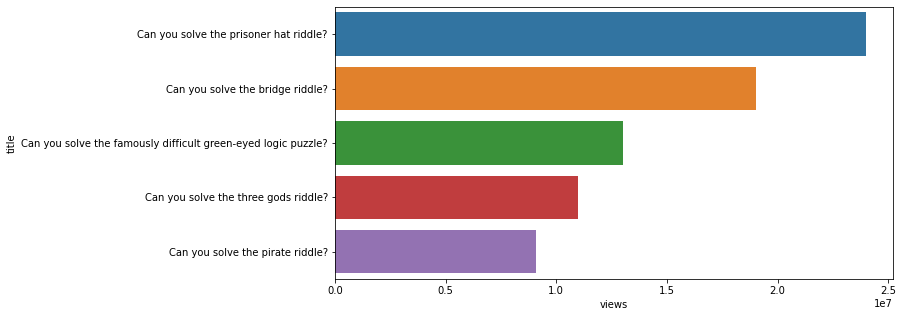

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(x='views',y='title',data=result.head())

conclusion: " Can you solve the prisoner hat riddle ?" is the favorite ted talk with 24 M views.